# ISLP - Chapter 9 - Exercise 6
### Author: pzuehlke

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

__6 (a):__ We will generate $ 40 $ points in total divided into two classes.
The $ x $- and $ y $-coordinates of each point are drawn from a standard normal,
but we shift all $ y $-coordinates of the points in one of the classes to make 
sure that they can (barely) be separated by a line. To generate a similar
dataset for item (c), we just have to repeat the same work while varying the
random seed (note that by varying this seed we can no longer guarantee that the
points belonging to different classes can be linearly separated).
To avoid code repetition, it makes sense to encapsulate this as a procedure.

In [ ]:
def generate_barely_separable_data(n=40, seed=0):
    rng = np.random.default_rng(seed)
    offset = 3.1  # to ensure that the two classes with seed=0 are separable
    # Generate x coordinates randomly for both classes. I got better results
    # this way than by using a single call to normal with size (n // 2, 2):
    X_0 = np.column_stack((rng.normal(0, 1, n // 2),  # x-coordinate
                           rng.normal(0, 1, size=n // 2)))  # y-coordinate
    X_1 = np.column_stack((rng.normal(0, 1, n // 2),  # x-coordinate
                           rng.normal(0, 1, size=n // 2) - offset))  # y-coord.
    # Labels:
    y_0 = np.zeros(n // 2)
    y_1 = np.ones(n // 2)
    # Combine data:
    X = np.vstack([X_0, X_1])
    y = np.hstack([y_0, y_1])
    # Shuffle:
    idx = rng.permutation(n)
    X = X[idx]
    y = y[idx]

    return X, y

We now generate the training data and plot it (the value of the offset
above was carefully chosen by experimenting and looking at the resulting picture):

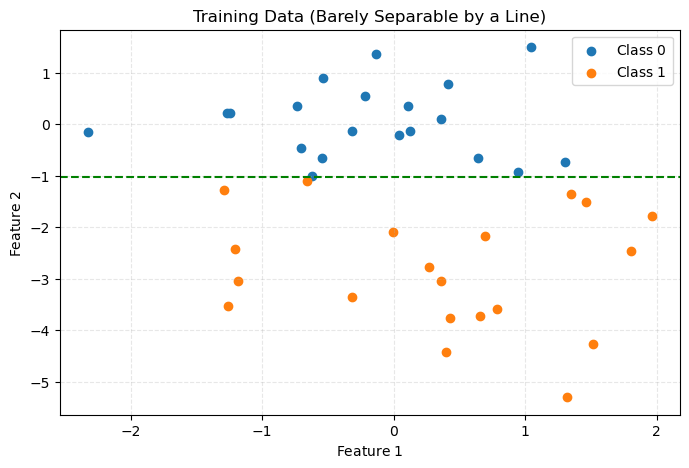

In [334]:
X, y = generate_barely_separable_data()

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X[y==0, 0], X[y==0, 1], label="Class $ 0 $")
ax.scatter(X[y==1, 0], X[y==1, 1], label="Class $ 1 $")
ax.axhline(y=X[y==0, 1].min() - 0.01, linestyle="--", color="green")
ax.set_xlabel("Feature $ 1 $")
ax.set_ylabel("Feature $ 2 $")
ax.set_title("Training Data (Barely Separable by a Line)")
ax.grid(alpha=0.3, linestyle="--")
ax.legend()
plt.show()

__6 (b):__ For all $ C = 10^{d} $ with $ d $ an integer between $ -5 $ and $ 4
$, we fit the corresponding support vector classifier and compute training and
CV error rates:

In [335]:
C_values = np.logspace(-5, 4, 10)

train_errors = []
cv_errors = []
misclassified = []

for C in C_values:
    svc = SVC(C=C, kernel="linear")
    svc.fit(X, y)
    
    y_pred_train = svc.predict(X)
    train_error = 1 - accuracy_score(y, y_pred_train)
    train_errors.append(train_error)
    
    n_misclassified = np.sum(y != y_pred_train)
    misclassified.append(n_misclassified)
    
    cv_scores = cross_val_score(SVC(C=C, kernel="linear"), X, y, cv=5)
    cv_error = 1 - np.mean(cv_scores)
    cv_errors.append(cv_error)

We now report the training and cross-validation error rates below:

In [336]:
# Display the results
results_b = pd.DataFrame({
    "C": C_values,
    "Training error rate": train_errors,
    "CV error rate": cv_errors,
    "Miscl. train. samples": misclassified
}).set_index("C")
results_b

,Training error rate,CV error rate,Miscl. train. samples
C,,,
0.00001,0.100,0.100,4
0.00010,0.100,0.100,4
0.00100,0.100,0.100,4
0.01000,0.050,0.050,2
0.10000,0.050,0.050,2
1.00000,0.000,0.075,0
10.00000,0.000,0.025,0
100.00000,0.025,0.075,1
1000.00000,0.000,0.075,0


We conclude that as $ C $ increases (or as the flexibility of the model
increases), there is a clear tendency for the training error rate to decrease.
However, the CV error rate remains relatively high even for very large values of
$ C $. Let's plot these error rates against $ C $:

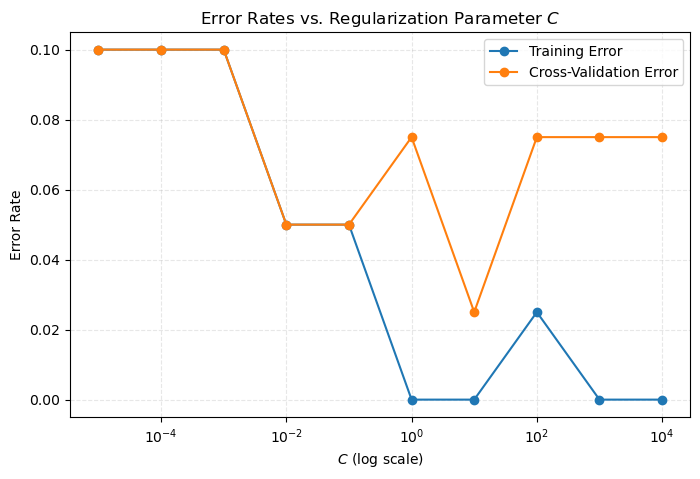

In [337]:
# Plot the results
fig, ax = plt.subplots(figsize=(8, 5))
ax.semilogx(C_values, train_errors, "-o", label="Training Error")
ax.semilogx(C_values, cv_errors, "-o", label="Cross-Validation Error")
ax.set_xlabel("$ C $ (log scale)")
ax.set_ylabel("Error Rate")
ax.set_title("Error Rates vs. Regularization Parameter $ C $")
ax.legend()
ax.grid(alpha=0.3, linestyle="--")
plt.show()

__6 (c):__ To generate the test set, we call the same procedure from item (a)
but with a different seed and a larger number of sample points (to decrease
the noise in the test error rates). The computation of the error rates
is practically identical to that done for item (b):

In [338]:
X_test, y_test = generate_barely_separable_data(n=200, seed=2)

test_errors = []
for C in C_values:
    # Create and train the model on training data:
    svc = SVC(C=C, kernel="linear")
    svc.fit(X, y)
    
    # Test error:
    y_pred_test = svc.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_errors.append(test_error)

Now let's report the results:

In [339]:
# Display the results:
results_c = pd.DataFrame({
    "C": C_values,
    "Training error rate": train_errors,
    "Test error rate": test_errors,
    "CV error rate": cv_errors,
    "Miscl. train. samples": misclassified
}).set_index("C")
results_c

,Training error rate,Test error rate,CV error rate,Miscl. train. samples
C,,,,
0.00001,0.100,0.105,0.100,4
0.00010,0.100,0.105,0.100,4
0.00100,0.100,0.105,0.100,4
0.01000,0.050,0.055,0.050,2
0.10000,0.050,0.065,0.050,2
1.00000,0.000,0.070,0.075,0
10.00000,0.000,0.070,0.025,0
100.00000,0.025,0.075,0.075,1
1000.00000,0.000,0.070,0.075,0


The test error rates decrease at first, as $ C $ goes from tiny values to more
moderate ones, but then it increases again and seems to stabilize at around $
7\% $. Let's compute the best values of $ C $ for each of the error rate types:


In [340]:
best_train_C = C_values[np.argmin(train_errors)]
best_cv_C = C_values[np.argmin(cv_errors)]
best_test_C = C_values[np.argmin(test_errors)]

print(f"Best C for training: {best_train_C}")
print(f"Best C for cross-validation: {best_cv_C}")
print(f"Best C for test: {best_test_C}")

Best C for training: 1.0
Best C for cross-validation: 10.0
Best C for test: 0.01


We see from this that the model that performs best on the test set is
considerably less flexible than the one that performs best on the training set
or according to cross-validation. This is in line with the bias-variance
trade-off discussed extensively in the book and in this chapter.

Let's plot the error rates together to get a better picture:

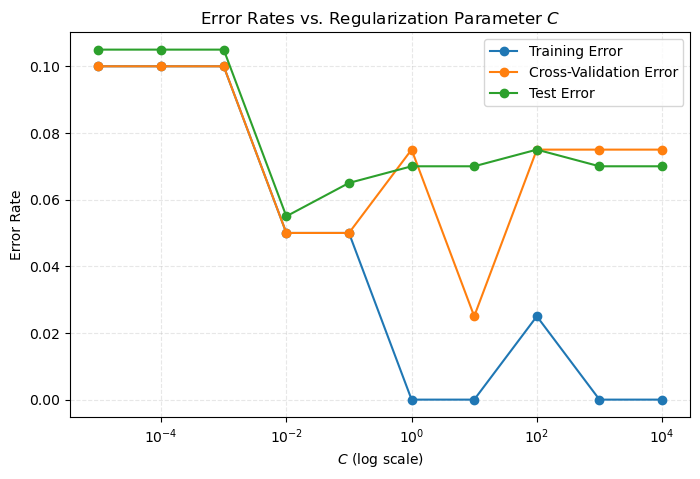

In [341]:
# Plot all error rates
fig, ax = plt.subplots(figsize=(8, 5))
ax.semilogx(C_values, train_errors, "-o", label="Training Error")
ax.semilogx(C_values, cv_errors, "-o", label="Cross-Validation Error")
ax.semilogx(C_values, test_errors, "-o", label="Test Error")
ax.set_xlabel("$ C $ (log scale)")
ax.set_ylabel("Error Rate")
ax.set_title("Error Rates vs. Regularization Parameter $ C $")
ax.legend()
ax.grid(alpha=0.3, linestyle="--")
plt.show()

__6 (d):__ The results confirm the claim from Section $ 9.6.1 $:

* Models with large $ C $ values (e.g., $ 100 $) have lower training error but
  higher test error because they fit the training data too closely (overfitting).
* Models with smaller $ C $ values (e.g., $ 0.01 $ or $ 0.1 $) allow a few
  misclassifications in the training data but achieve better test performance
  because they capture the underlying pattern rather than noise.

Again, this demonstrates the bias-variance tradeoff. 